# Notebook Nb1 is dedicated to the cleaning of the dataset

We will clean this simple dataset to predict in the second notebook the ROI criterium based on different features to choose more accurately our clients while making B2B contracts. The features are the FacilityType with values such as a beach, a spa, a store, the Region are annonymized as A, B, C etc and Area2refArea is an area divived by a reference area to enable the data to be public. There are also power stored as hot water, and as electricy generated by solar panels and wind turbines.

In [2]:
# importations des librairies
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.impute import KNNImputer

# uploader dataset csv files
data2018 = pd.read_csv('DataSmartGrid2018v2.csv')

# 2015 dataset description 
print('Le dataset principal est une dataframe 2018 :', isinstance(data2018, pd.DataFrame))
data2018_size = data2018.shape
print('Taille du dataset:', data2018_size, "\n")

data2018.head()

Le dataset principal est une dataframe 2018 : True
Taille du dataset: (1017, 7) 



,FacilityType,Region,Area2refArea,Hotwater(kWh),SolarPanel(kWh),Wind(kWh),ROI criterium
0,Beach,B,746.3,0.0,206.5,765.4,69.8
1,Beach,B,1528.9,0.0,372.7,5042.9,245.8
2,Store,I,427.2,0.0,585.9,258.3,56.5
3,Store,I,442.6,0.0,729.3,5661.8,277.5
4,Beach,D,365.7,0.0,207.6,775.7,70.3


**Defines functions to analyze, clean and restore data. Particularly efficient on use datasets.**
- Meta analysis of the filled and missing values 
- Analysis of the features containing objects  
- Analysis of the features containing non objects  
- Filling missing values on a subset of the dataframe based on kNN 
- Removing outliers defined statistically (following the rigorous math def: values  located above the third quantile  plus  150% of distance between the first and the third quantile and values under the first quantile minus the same distance 

In [3]:
# Full Analysis of the dataframe
def Full_Analysis_df(data_frame,str1ng):
    Meta_df(data_frame,str1ng)
    Analysis_non_obj_df(data_frame)
    Hist_comp_non_obj_df(data_frame)
    Analysis_obj_df(data_frame)    
    return

# Analysis of the metadata of dataframe
def Meta_df(data_frame,str1ng):
    Meta_data = ((pd.DataFrame({'Filled values':pd.notnull(data_frame).sum(), 'Missing_values':pd.isnull(data_frame).sum()})
                 /(data_frame.shape[0]/100)).sort_values(by=['Missing_values'], ascending=False))
    (Meta_data.plot.bar(stacked=True,
                        figsize=(20,5),
                        title = 'Filled and missing values in % for {} with the shape {}'.format(str1ng,data_frame.shape),
                        fontsize = 14))
    return Meta_data

# Analysis of the columns containing objects
def Analysis_obj_df(data_frame):
    data_frame_obj = data_frame.select_dtypes(include='object')
    Nb_col_data_frame_obj = data_frame_obj.shape[1]
    fig1 = plt.figure(figsize=(10, 10*Nb_col_data_frame_obj))
    icb = 1
    for col_data_frame_obj in data_frame_obj:
        nb_cat_temp = len(data_frame_obj[col_data_frame_obj].unique())
        plt.subplot(Nb_col_data_frame_obj,1,icb)
        data_frame_obj[col_data_frame_obj].value_counts()[:10].plot(kind='barh', 
                                                                    figsize=(10,10), 
                                                                    title = '{} with {} categories'.format(col_data_frame_obj,nb_cat_temp))
        plt.show()
        icb += 1
    return

# Analysis of the columns not containing objects
def Analysis_non_obj_df(data_frame):
    data_frame_Nobj = data_frame.select_dtypes(exclude='object')
    Nb_col_data_frame_Nobj = data_frame_Nobj.shape[1]
    fig = plt.figure(figsize=(20, 1*Nb_col_data_frame_Nobj))
    ic = 1
    sns.set(font_scale = 1)
    for col_data_frame_Nobj in data_frame_Nobj:
        plt.subplot(Nb_col_data_frame_Nobj,1,ic)
        sns.boxplot(x=data_frame_Nobj[col_data_frame_Nobj])
        fig.subplots_adjust(hspace=2)
        ic += 1
    plt.show()
    return

# Function plotting histograms, distribution plots, mean and median for features containing numerical values
def Hist_comp_non_obj_df(data_frame):
    data_frame_Nobj = data_frame.select_dtypes(exclude='object').dropna()
    Nb_col_data_frame_Nobj = data_frame_Nobj.shape[1]
    ih = 1
    for col_data_frame_Nobj in data_frame_Nobj:
        arr_temp = data_frame_Nobj[col_data_frame_Nobj]
        plt.figure(figsize=(6, 4))
        ax_temp = sns.distplot(arr_temp)
        plt.axvline(np.mean(arr_temp), color='b', linestyle='dashed', linewidth=3)
        plt.axvline(np.median(arr_temp), color='orange', linestyle='dashed', linewidth=3)
        plt.title('Distribution, Mean (blue), Median (orange) for the feature {}'.format(col_data_frame_Nobj))
        plt.show()
    return

# Function checking the boxplots of a target for each categories 
# of features with less than cat_limit (default 30 categories)
def Box_taget_cat(data_frame,target,cat_limit=30):
    data_frame_obj = data_frame.select_dtypes(include='object')
    Nb_col_data_frame_obj = data_frame_obj.shape[1]
    for col_data_frame_obj in data_frame_obj:
        nb_cat_temp = len(data_frame_obj[col_data_frame_obj].unique())
        if nb_cat_temp <= cat_limit:
            cat_temp = sns.catplot(x=col_data_frame_obj,
                                   y=target,
                                   kind="box", 
                                   data=data_frame, 
                                   height = 4,
                                   aspect = 2)
            cat_temp.set_xticklabels(rotation=90)
            plt.show()
        else:
            continue
    return

# Function checking the mean and standard deviation of a target for each categories 
# of features with less than cat_limit (default 30 categories)
def Mean_std_target_cat(data_frame,target,cat_limit=30,fig_length=8,fig_height=4):
#    data_frame_obj = data_frame.select_dtypes(include='object')
    data_frame_obj = data_frame
    Nb_col_data_frame_obj = data_frame_obj.shape[1]
    for col_data_frame_obj in data_frame_obj:
        nb_cat_temp = len(data_frame_obj[col_data_frame_obj].unique())
        if nb_cat_temp <= cat_limit:
            list_temp = [col_data_frame_obj,target]
            mean_targ_cat =data_frame[list_temp].groupby(col_data_frame_obj).mean() 
            std_targ_cat =data_frame[list_temp].groupby(col_data_frame_obj).std()
            plt.figure(figsize=(fig_length, fig_height))
            plt.errorbar(mean_targ_cat.index, 
                         mean_targ_cat[target],
                         std_targ_cat[target], 
                         fmt='o', color='blue',ecolor='c', elinewidth=3, capsize=0)
            plt.xticks(rotation=90)
            plt.title('{}: Mean and Standard Dev. for each {}'.format(target,col_data_frame_obj))
        else:
            continue
    return

# Function checking the potential linear relationship between a target and features containing numerical values
def Target_Nobj_pairpl(data_frame,target):
    data_frame_Nobj = data_frame.drop(columns=target).select_dtypes(exclude='object')
    list_Nobj = list(data_frame_Nobj.columns)
    Nb_col_data_frame_Nobj = data_frame_Nobj.shape[1]
    min_list = np.arange(0,Nb_col_data_frame_Nobj,5).tolist()
    max_list = np.arange(5,Nb_col_data_frame_Nobj,5).tolist()
    l_min_list = len(min_list)
    l_max_list = len(max_list)
    if l_min_list > l_max_list:
        max_list.insert(l_min_list, Nb_col_data_frame_Nobj)
    else:
            pass
    for ia, ib in list(zip(min_list, max_list)):
#        print(ia,ib)
        pp_temp = sns.pairplot(data = data_frame,
                  y_vars=[target],
                  x_vars=list_Nobj[ia:ib], 
                  kind="reg", 
                  height = 3)    
    return

# Fonction filling the missing values with predicted values based on kNN on the df limited to the list of features, 
# inputs: the entire df and the list of features which are taken into account in the kNN
# output: the entire df with filled with predicted values only the features selected in the list.
def KNN_in_df(data_frame,list1):
    imputer = KNNImputer(n_neighbors=2)
    df_restriced = data_frame[list1]
    data_frame_truncated = data_frame.reset_index().drop(columns=df_restriced.columns)
    arr_restriced = imputer.fit_transform(df_restriced)
    new_df_restricted = pd.DataFrame(arr_restriced,columns=df_restriced.columns).reset_index()
    new_df = data_frame_truncated.merge(new_df_restricted, left_index=True, right_index=True).drop(columns=['index_x','index_y'])
    return new_df

# Fonction filtering by default values between Q1-1.5IQR and Q3+1.5IQR: Outliers remover
def FilterIQR(data_frame,str1ng,kiqr=1.5):
    Q1 = data_frame[str1ng].quantile(0.25)
    Q3 = data_frame[str1ng].quantile(0.75)
    IQR = Q3 - Q1
    low_limit = Q1 - (kiqr * IQR)
    high_limit = Q3 + (kiqr * IQR)
    data_frame = data_frame.drop(data_frame[(data_frame[str1ng] > high_limit) 
                                                           | (data_frame[str1ng] < low_limit)].index)
    return data_frame

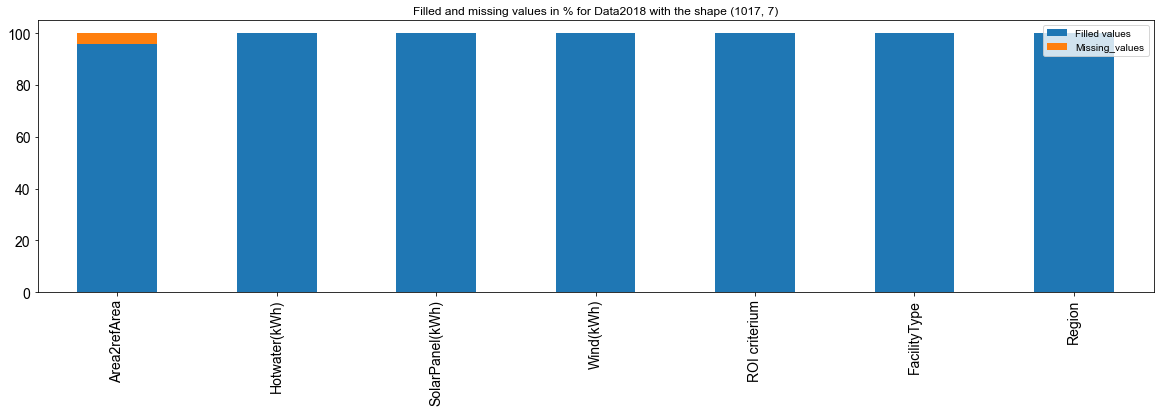

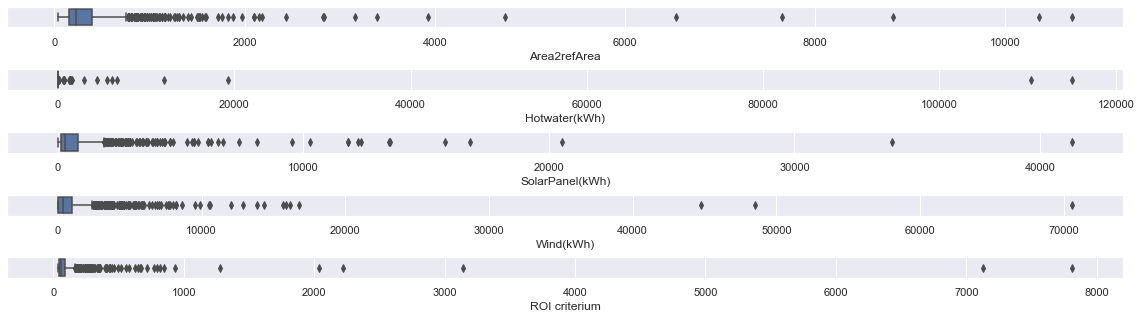

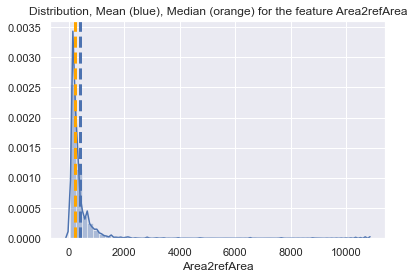

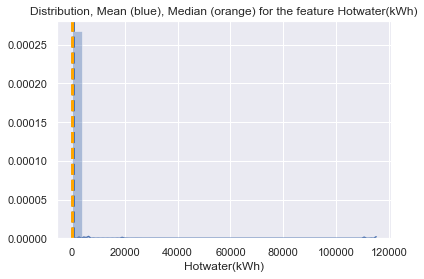

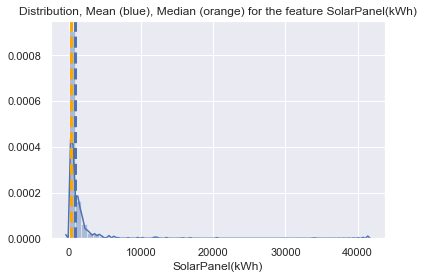

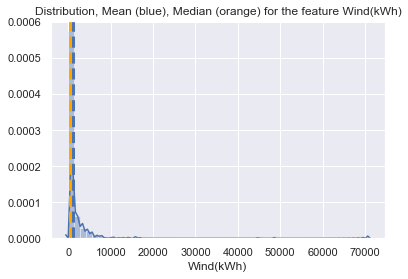

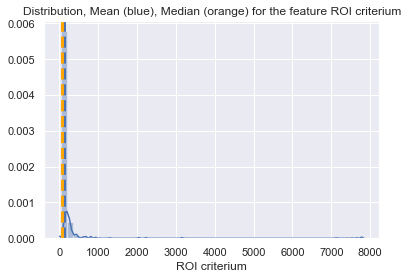

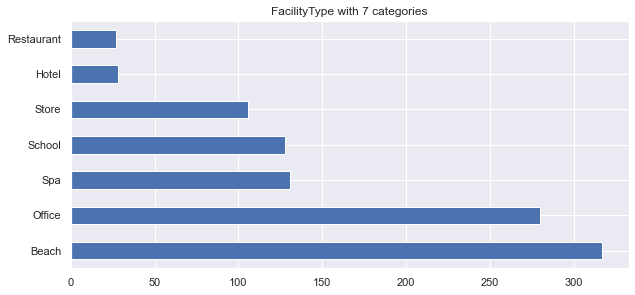

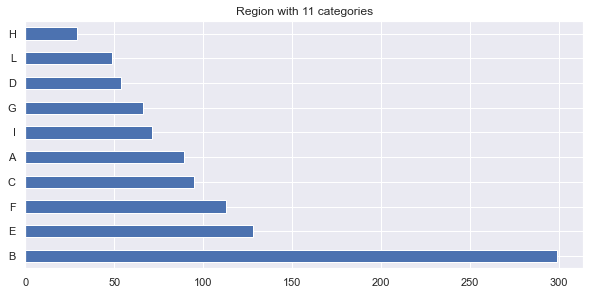

In [4]:
Full_Analysis_df(data2018,'Data2018')

Check the duplicates in df

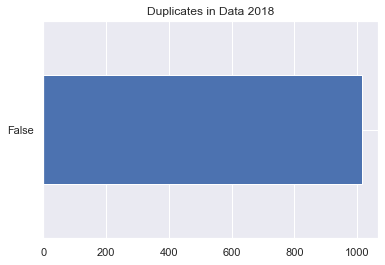

In [5]:
duplicate_rows_data2018 = data2018.duplicated(subset=None, keep='first')
duplicate_rows_data2018.value_counts().plot(kind='barh',title = 'Duplicates in Data 2018')
plt.show()

**Merging Region L with Region F**

In [6]:
data2018['Region'].unique()

array(['B', 'I', 'D', 'H', 'E', 'F', 'G', 'L', 'C', 'A', 'K'],
      dtype=object)

In [7]:
data2018.replace({'Region': 'L'}, {'Region': 'F'}, inplace =True)
data2018['Region'].unique()

array(['B', 'I', 'D', 'H', 'E', 'F', 'G', 'C', 'A', 'K'], dtype=object)

**Removing Region H and D, those regions are not of interest in this study**

In [8]:
mask1_2018= ((data2018['Region'] == 'H') 
             | (data2018['Region'] == 'D'))
data2018 = data2018[~mask1_2018]

print("Valeurs uniques pour la feature :", data2018['Region'].nunique())

Valeurs uniques pour la feature : 8


**Label encoding the features with categorical values can be useful before applying a knn imputer.** \
Comment 1: This encoding is not necessary for using the knn imputer in the present study but can be critical to restore feature values for other dataset.
Comment 2: Many strategies exist to restore missing values, the simplest are inputing the mean, the median values or zero.

In [9]:
from sklearn import utils
from sklearn.preprocessing import LabelEncoder
# Encoding Region  and Facility Type if needed
val_toenc_Reg = data2018['Region']
lab_enc_Reg = LabelEncoder()
lab_enc_Reg.fit(val_toenc_Reg[val_toenc_Reg.notnull()])

# if one needs to encode a column with some nan value, one specifies the index of non nan value 
#when storing the encoded value in the column as it follows

#data2018['Region'] = pd.Series(lab_enc_LP.fit_transform(val_toenc_LP[val_toenc_LP.notnull()]),
#                               index=val_toenc_LP[val_toenc_LP.notnull()].index)

import pickle
#exporting the Region encoder
output = open('Reg_encoder.pkl', 'wb')
pickle.dump(lab_enc_Reg, output)
output.close()


val_toenc_FT = data2018['FacilityType']
lab_enc_FT = LabelEncoder()
lab_enc_FT.fit(val_toenc_FT[val_toenc_FT.notnull()])

#exporting FacilityType encoder
output = open('FT_encoder.pkl', 'wb')
pickle.dump(lab_enc_FT, output)
output.close()

**Removing outliers and checking the results on numerical values contained in the features**

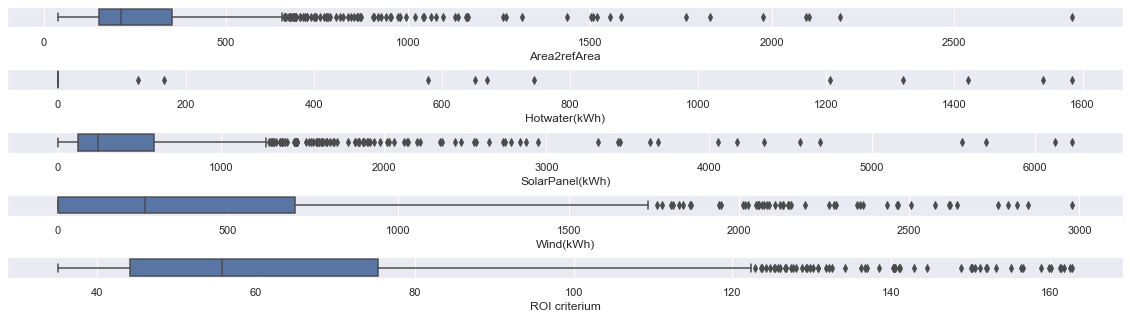

In [10]:
data2018_fil = FilterIQR(data2018,'ROI criterium') 
Analysis_non_obj_df(data2018_fil)

**Removing extra outliers based on the boxplots observed above** 

In [12]:
data2018_fil2 = data2018_fil.drop(data2018_fil[(data2018_fil['Area2refArea'] > 2000) | (data2018_fil['SolarPanel(kWh)'] > 5000)].index)

**Checking the remaining missing values on the dataframe 2018**

In [13]:
df_missing_values = pd.DataFrame({'Missing values 2018':pd.isnull(data2018_fil2).sum()}).sort_values(by=['Missing values 2018'],
                                                                                                     ascending=False)
df_missing_values

,Missing values 2018
Area2refArea,37
Hotwater(kWh),1
SolarPanel(kWh),1
Wind(kWh),1
ROI criterium,1
FacilityType,0
Region,0


**Filling the missing values thanks to the KNN**

In [15]:
list_2018_kNN = df_missing_values[df_missing_values['Missing values 2018'] > 0].index.tolist() # to remove Nan and 0
data2018_kNN = KNN_in_df(data2018_fil2,list_2018_kNN)


# former categorical values that were changed to ints before KNN can be reconvert to categorical values after the KNN, if needed
# as the following example
#val_toenc_Reg_2018 = data2018_kNN['Region']
#data2018_kNN['Region'] = pd.Series(lab_enc_Reg.inverse_transform(val_toenc_Reg_2018[val_toenc_Reg_2018.notnull()].astype(int)),
#                                                        index=val_toencReg_2018[val_toencReg_2018.notnull()].index)

# checking if the value inputed by the knn inputer are in the initial min max range
print("Area2refArea 2018 before KNN inputer, Max:", data2018_fil2['Area2refArea'].max(), 
      "Min:", data2018_fil2['Area2refArea'].min())
print("Area2refArea 2018 after KNN inputer, Max:", data2018_kNN['Area2refArea'].max(), 
      "Min:",data2018_kNN['Area2refArea'].min(), "\n")

df_missing_values_aftKNN = pd.DataFrame({'Missing values 2018':pd.isnull(data2018_kNN).sum()}).sort_values(by=['Missing values 2018'],
                                                                                                           ascending=False)
df_missing_values_aftKNN

Area2refArea 2018 before KNN inputer, Max: 1977.2 Min: 38.3
Area2refArea 2018 after KNN inputer, Max: 1977.2 Min: 38.3 



,Missing values 2018
FacilityType,0
Region,0
Area2refArea,0
Hotwater(kWh),0
SolarPanel(kWh),0
Wind(kWh),0
ROI criterium,0


**A little Feature Engineering on this little dataset. Smart features can be added if needed such as adaptation index relating the type of energy to the type of facility etc**

In [16]:
# divide each type of energy by the sum all the energies, 
#sum of all energies is divided by Area2refArea an area divided by a reference area
def FeatEng(data_frame):
    
    data_frame['Energy_tot(kWh)'] = data_frame['Hotwater(kWh)'] + data_frame['SolarPanel(kWh)'] + data_frame['Wind(kWh)']
    
    data_frame['Hotwater(kWh)_Etot'] = (data_frame['Hotwater(kWh)'] / data_frame['Energy_tot(kWh)'])
    data_frame['SolarPanel(kWh)_Etot'] = (data_frame['SolarPanel(kWh)'] / data_frame['Energy_tot(kWh)'])
    data_frame['Wind(kWh)_Etot'] = (data_frame['Wind(kWh)'] / data_frame['Energy_tot(kWh)'])
    
    data_frame.drop(columns = ['Hotwater(kWh)',
                               'SolarPanel(kWh)',
                               'Wind(kWh)'], inplace = True)
    
    data_frame['Energy_tot(kWh_Area)'] = data_frame['Energy_tot(kWh)']/data_frame['Area2refArea']
    
    data_frame.drop(columns = ['Energy_tot(kWh)'], inplace = True)
    
    return data_frame

data2018_feateng = FeatEng(data2018_kNN)
data2018_feateng.describe()

,Area2refArea,ROI criterium,Hotwater(kWh)_Etot,SolarPanel(kWh)_Etot,Wind(kWh)_Etot,Energy_tot(kWh_Area)
count,818.000000,818.000000,818.000000,818.000000,818.000000,818.000000
mean,307.145110,64.091015,0.009245,0.564982,0.425773,3.852654
std,259.571471,27.550930,0.083363,0.360641,0.360364,3.722513
min,38.300000,35.100000,0.000000,0.000000,0.000000,0.009129
25%,150.225000,44.100000,0.000000,0.223486,0.000000,1.551871
50%,213.650000,55.500000,0.000000,0.499064,0.474567,2.913472
75%,350.000000,75.100000,0.000000,1.000000,0.771152,4.945053
max,1977.200000,162.800000,0.904808,1.000000,1.000000,41.684073


**Let's "MinMax" scale and then let's check the correlations**

In [17]:
# Normalizer before correlation check
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

data2018_MinMax= pd.DataFrame(scaler.fit_transform(data2018_feateng.select_dtypes(exclude='object')),
                              columns=data2018_feateng.select_dtypes(exclude='object').columns)

data2018_MinMax.head()

,Area2refArea,ROI criterium,Hotwater(kWh)_Etot,SolarPanel(kWh)_Etot,Wind(kWh)_Etot,Energy_tot(kWh_Area)
0,0.365156,0.271731,0.0,0.212470,0.787530,0.031030
1,0.200578,0.167580,0.0,0.694030,0.305970,0.047198
2,0.248337,0.063430,0.0,1.000000,0.000000,0.019728
3,0.177472,0.470634,0.0,0.882470,0.117530,0.175648
4,0.206664,0.043853,0.0,0.508799,0.491201,0.010341


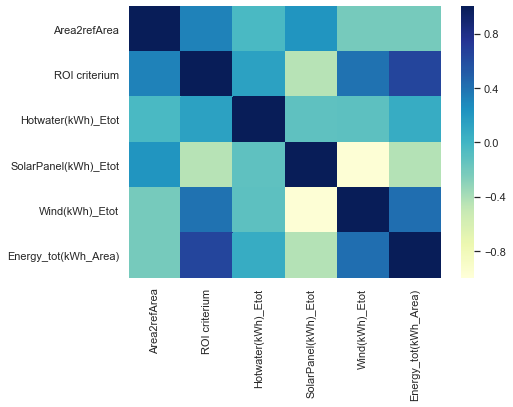

In [19]:
#correlations' study on normalized dataframe excluding objets 
corr_data2018_MinMax = data2018_MinMax.corr()
plt.figure(figsize=(7, 5))
sns.set(font_scale=1)
ax = sns.heatmap(corr_data2018_MinMax, cmap="YlGnBu", vmin=-1, vmax=1)

**Above one can check the strong correlation in dark blue and in beige. \
Now let's see more in detail the relationshio between the target ROI criterium and the features with multivarite analyses**

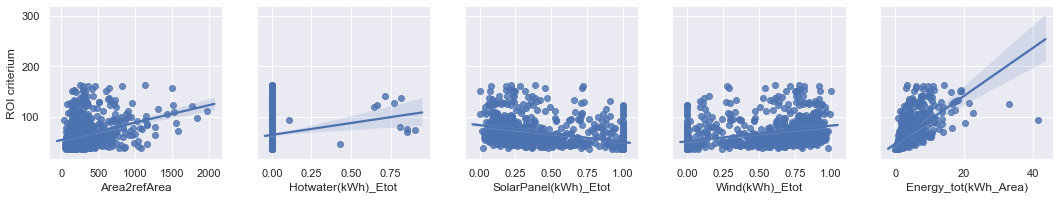

In [20]:
Target_Nobj_pairpl(data2018_feateng,'ROI criterium')

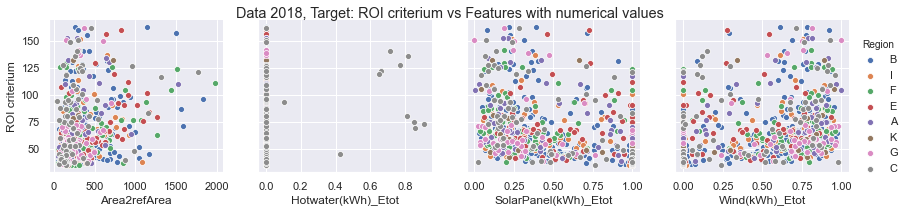

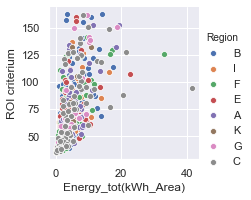

In [22]:
list_taget = list(data2018_feateng.drop(columns=['ROI criterium',
                                                 'FacilityType', 
                                                 'Region']).columns)
pp1_reg = sns.pairplot(data = data2018_feateng,
                       y_vars=['ROI criterium'],
                       x_vars=list_taget[:4], 
                       hue='Region', 
                       height = 3)
pp1_reg.fig.suptitle("Data 2018, Target: ROI criterium vs Features with numerical values")

pp2_reg = sns.pairplot(data = data2018_feateng,
                       y_vars=['ROI criterium'],
                       x_vars=list_taget[4:5], 
                       hue='Region', 
                       height = 3)

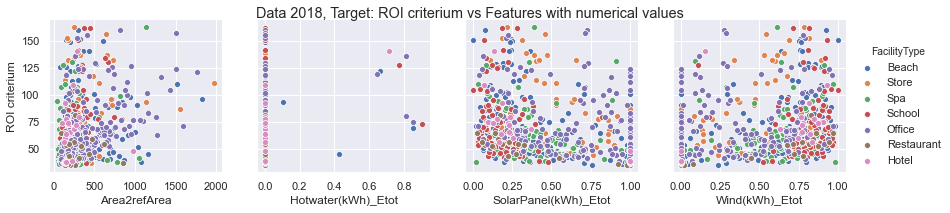

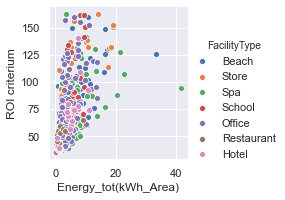

In [24]:
pp1_ft = sns.pairplot(data = data2018_feateng,
                      y_vars=['ROI criterium'],
                      x_vars=list_taget[:4], 
                      hue='FacilityType', 
                      height = 3)
pp1_ft.fig.suptitle("Data 2018, Target: ROI criterium vs Features with numerical values")

pp2_ft = sns.pairplot(data = data2018_feateng,
                      y_vars=['ROI criterium'],
                      x_vars=list_taget[4:5], 
                      hue='FacilityType', 
                      height = 3)

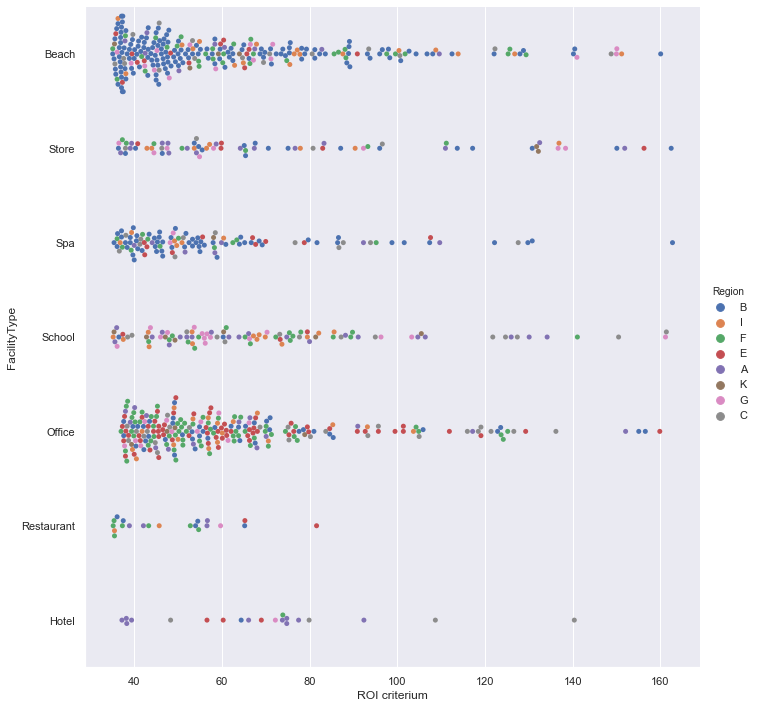

In [27]:
sns.catplot(x='ROI criterium',
            y='FacilityType', 
            hue='Region', 
            kind="swarm", 
            data=data2018_feateng, 
            height = 10)
plt.show()

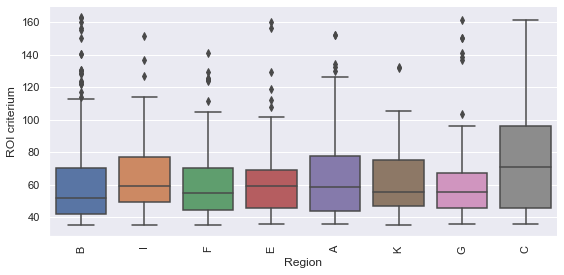

In [28]:
ng = sns.catplot(x='Region',
            y='ROI criterium',
            kind="box", 
            data=data2018_feateng, 
            height = 4, aspect = 2)
ng.set_xticklabels(rotation=90)
plt.show()

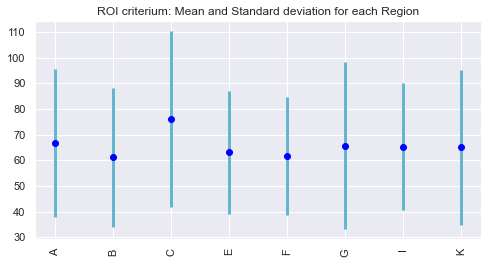

In [29]:
mean_CO2_reg =data2018_feateng[['Region','ROI criterium']].groupby('Region').mean() 
std_CO2_reg =data2018_feateng[['Region','ROI criterium']].groupby('Region').std()

plt.figure(figsize=(8, 4))
plt.errorbar(mean_CO2_reg.index, mean_CO2_reg['ROI criterium'],#
             std_CO2_reg['ROI criterium'], 
             fmt='o', color='blue',ecolor='c', elinewidth=3, capsize=0)
plt.xticks(rotation=90)
plt.title('ROI criterium: Mean and Standard deviation for each Region')
plt.show()

After checking the mean and the standard deviation for each region, let's perform ANOVA test

In [30]:
from scipy.stats import f_oneway
df_anova_reg = data2018_feateng[['ROI criterium','Region']]
grps = pd.unique(df_anova_reg['Region'].values)
d_data = {grp:df_anova_reg['ROI criterium'][df_anova_reg['Region'] == grp] for grp in grps}
f_anova, p_anova = f_oneway(d_data['A'], 
                            d_data['B'], 
                            d_data['C'],
                            d_data['E'],
                            d_data['F'],
                            d_data['G'],
                            d_data['I'],
                            d_data['K'])
print('Anova test on array 2018: Saved CO2 criterium and Region, F value=%.3f, P value=%.8f' % (f_anova, p_anova))

Anova test on array 2018: Saved CO2 criterium and Region, F value=2.902, P value=0.00530610


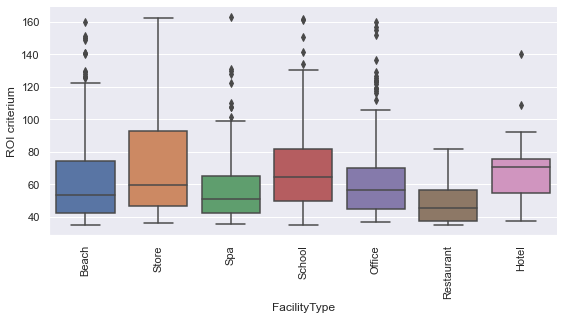

In [31]:
ns = sns.catplot(x='FacilityType',
            y='ROI criterium',
            kind="box", 
            data=data2018_feateng, 
            height = 4, aspect = 2)
ns.set_xticklabels(rotation=90)
plt.show()

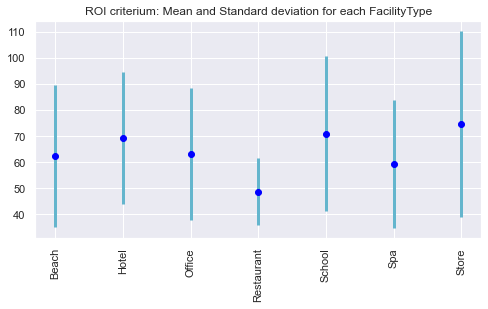

In [32]:
mean_2018_ft =data2018_feateng[['FacilityType','ROI criterium']].groupby('FacilityType').mean() 
std_2018_ft =data2018_feateng[['FacilityType','ROI criterium']].groupby('FacilityType').std()

plt.figure(figsize=(8, 4))
plt.errorbar(mean_2018_ft.index, mean_2018_ft['ROI criterium'],#
             std_2018_ft['ROI criterium'], 
             fmt='o', color='blue',ecolor='c', elinewidth=3, capsize=0)
plt.xticks(rotation=90)
plt.title('ROI criterium: Mean and Standard deviation for each FacilityType')
plt.show()

In [33]:
df_anova_ft = data2018_feateng[['ROI criterium','FacilityType']]
grps_ft = pd.unique(df_anova_ft['FacilityType'].values)
d_data_ft = {grp:df_anova_ft['ROI criterium'][df_anova_ft['FacilityType'] == grp] for grp in grps_ft}
f_anova_ft, p_anova_ft = f_oneway(d_data_ft['Beach'], 
                            d_data_ft['Hotel'], 
                            d_data_ft['Office'],
                            d_data_ft['Restaurant'],
                            d_data_ft['School'],
                            d_data_ft['Spa'],
                            d_data_ft['Store'])
print('Anova test on array 2018: ROI criterium and FacilityType, F value=%.3f, P value=%.10f' % (f_anova_ft, p_anova_ft))

Anova test on array 2018: ROI criterium and FacilityType, F value=4.771, P value=0.0000860122


**Chi-Square Test: simple example between 'Region' and 'FacilityType'**

In [34]:
from scipy.stats import chi2_contingency
from scipy.stats import chi2
conting_table=pd.crosstab(data2018_feateng['Region'],data2018_feateng['FacilityType'])

Observed_Values = conting_table.values 
b=chi2_contingency(conting_table)
Expected_Values = b[3]

no_of_rows=len(conting_table.iloc[:,0])
no_of_columns=len(conting_table.iloc[0,:])
ddof=(no_of_rows-1)*(no_of_columns-1)
print("Degree of Freedom:",ddof)
alpha = 0.05

# idem que b[0] :
#chi_square=sum([(o-e)**2./e for o,e in zip(Observed_Values,Expected_Values)])
#chi_square_statistic = sum(chi_square)
chi_square_statistic = b[0]
critical_value=chi2.ppf(q=1-alpha,df=ddof)
p_value=1.0-chi2.cdf(x=chi_square_statistic,df=ddof)

print('Significance level: ',alpha)
print('Degree of Freedom: ',ddof)
print('chi-square statistic:',chi_square_statistic)
print('critical_value:',critical_value)
print('p-value:',p_value)

if chi_square_statistic>=critical_value: # or p_value<=alpha:
    print("Reject H0,There is a relationship between 2 categorical variables")
else:
    print("Retain H0,There is no relationship between 2 categorical variables")

Degree of Freedom: 42
Significance level:  0.05
Degree of Freedom:  42
chi-square statistic: 335.72065351388574
critical_value: 58.12403768086803
p-value: 0.0
Reject H0,There is a relationship between 2 categorical variables


**Saving the dataframe for future use on the notebook 2**

In [35]:
data2018_feateng.to_csv('data2018_featengv2.csv', index=False)